In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: XEM-USD
Start: 2021-01-22 18:00:00+00:00, End: 2021-03-22 14:30:00+00:00
Training data: 1269 
Tsesting data: 1270 


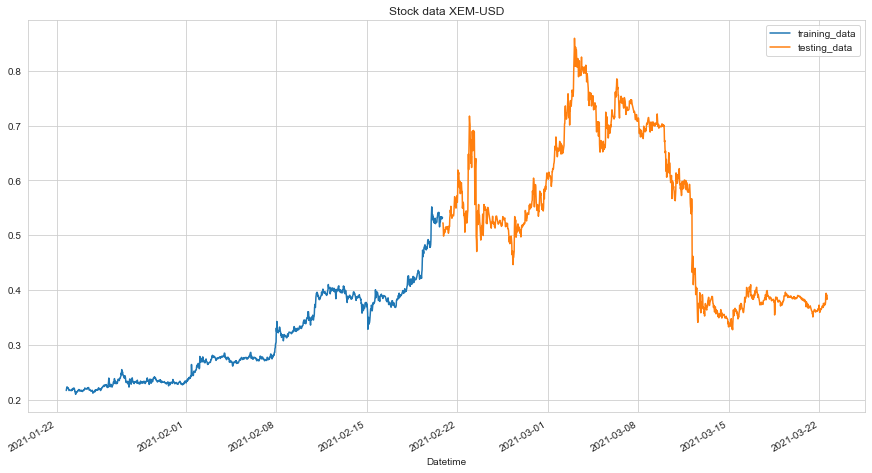

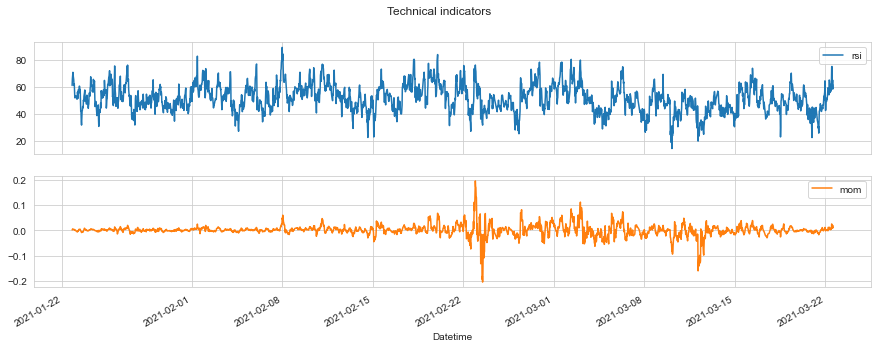

In [2]:
stock_name = 'xem-usd'.upper()
industry = 'Cryptocurrency'
stock_data = pd.read_csv(f'data/{stock_name}.csv', index_col=['Datetime'], parse_dates=True)
n_train = len(stock_data)//2

train_data = stock_data.iloc[:n_train]
test_data = stock_data.iloc[n_train:]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1405.10, duration: 0:00:00.210047
episode: 2/2000, episode end value: 1409.55, duration: 0:00:00.219050
episode: 3/2000, episode end value: 1410.80, duration: 0:00:00.218052
episode: 4/2000, episode end value: 1410.20, duration: 0:00:00.219045
episode: 5/2000, episode end value: 1412.57, duration: 0:00:00.238056
episode: 6/2000, episode end value: 1411.35, duration: 0:00:00.227051
episode: 7/2000, episode end value: 1418.83, duration: 0:00:00.248059
episode: 8/2000, episode end value: 1411.88, duration: 0:00:00.232054
episode: 9/2000, episode end value: 1412.45, duration: 0:00:00.266056
episode: 10/2000, episode end value: 1413.34, duration: 0:00:00.275062
episode: 11/2000, episode end value: 1413.69, duration: 0:00:00.257056
episode: 12/2000, episode end value: 1413.28, duration: 0:00:00.280065
episode: 13/2000, episode end value: 1414.16, duration: 0:00:00.316087
episode: 14/2000, episode end value: 1413.58, duration: 0:00:00.349061
episode: 15/200

episode: 117/2000, episode end value: 1420.12, duration: 0:00:00.271064
episode: 118/2000, episode end value: 1411.69, duration: 0:00:00.266054
episode: 119/2000, episode end value: 1418.01, duration: 0:00:00.262063
episode: 120/2000, episode end value: 1407.78, duration: 0:00:00.276059
episode: 121/2000, episode end value: 1412.84, duration: 0:00:00.255056
episode: 122/2000, episode end value: 1410.15, duration: 0:00:00.258060
episode: 123/2000, episode end value: 1424.96, duration: 0:00:00.287063
episode: 124/2000, episode end value: 1431.12, duration: 0:00:00.269064
episode: 125/2000, episode end value: 1410.12, duration: 0:00:00.260069
episode: 126/2000, episode end value: 1417.15, duration: 0:00:00.244039
episode: 127/2000, episode end value: 1418.45, duration: 0:00:00.242053
episode: 128/2000, episode end value: 1409.56, duration: 0:00:00.269061
episode: 129/2000, episode end value: 1411.99, duration: 0:00:00.262057
episode: 130/2000, episode end value: 1417.42, duration: 0:00:00

episode: 231/2000, episode end value: 1413.04, duration: 0:00:00.296067
episode: 232/2000, episode end value: 1419.96, duration: 0:00:00.294068
episode: 233/2000, episode end value: 1413.40, duration: 0:00:00.296067
episode: 234/2000, episode end value: 1415.43, duration: 0:00:00.281063
episode: 235/2000, episode end value: 1416.08, duration: 0:00:00.275058
episode: 236/2000, episode end value: 1403.43, duration: 0:00:00.284064
episode: 237/2000, episode end value: 1408.36, duration: 0:00:00.257059
episode: 238/2000, episode end value: 1415.62, duration: 0:00:00.272067
episode: 239/2000, episode end value: 1411.86, duration: 0:00:00.293060
episode: 240/2000, episode end value: 1422.29, duration: 0:00:00.294065
episode: 241/2000, episode end value: 1420.96, duration: 0:00:00.263061
episode: 242/2000, episode end value: 1404.86, duration: 0:00:00.281060
episode: 243/2000, episode end value: 1417.76, duration: 0:00:00.297075
episode: 244/2000, episode end value: 1415.27, duration: 0:00:00

episode: 345/2000, episode end value: 1407.69, duration: 0:00:00.285063
episode: 346/2000, episode end value: 1414.30, duration: 0:00:00.288066
episode: 347/2000, episode end value: 1409.31, duration: 0:00:00.290061
episode: 348/2000, episode end value: 1411.82, duration: 0:00:00.283063
episode: 349/2000, episode end value: 1413.17, duration: 0:00:00.294068
episode: 350/2000, episode end value: 1409.91, duration: 0:00:00.295065
episode: 351/2000, episode end value: 1414.16, duration: 0:00:00.281064
episode: 352/2000, episode end value: 1416.03, duration: 0:00:00.274059
episode: 353/2000, episode end value: 1420.78, duration: 0:00:00.287063
episode: 354/2000, episode end value: 1421.41, duration: 0:00:00.290065
episode: 355/2000, episode end value: 1416.92, duration: 0:00:00.292066
episode: 356/2000, episode end value: 1419.53, duration: 0:00:00.287069
episode: 357/2000, episode end value: 1411.17, duration: 0:00:00.296061
episode: 358/2000, episode end value: 1421.11, duration: 0:00:00

episode: 459/2000, episode end value: 1406.29, duration: 0:00:00.351078
episode: 460/2000, episode end value: 1413.65, duration: 0:00:00.331076
episode: 461/2000, episode end value: 1420.78, duration: 0:00:00.310069
episode: 462/2000, episode end value: 1407.53, duration: 0:00:00.317073
episode: 463/2000, episode end value: 1414.38, duration: 0:00:00.305069
episode: 464/2000, episode end value: 1415.45, duration: 0:00:00.305066
episode: 465/2000, episode end value: 1403.80, duration: 0:00:00.309070
episode: 466/2000, episode end value: 1412.83, duration: 0:00:00.315072
episode: 467/2000, episode end value: 1412.90, duration: 0:00:00.334074
episode: 468/2000, episode end value: 1415.67, duration: 0:00:00.310069
episode: 469/2000, episode end value: 1422.44, duration: 0:00:00.305069
episode: 470/2000, episode end value: 1410.82, duration: 0:00:00.319074
episode: 471/2000, episode end value: 1421.54, duration: 0:00:00.311072
episode: 472/2000, episode end value: 1420.73, duration: 0:00:00

episode: 573/2000, episode end value: 1413.48, duration: 0:00:00.305073
episode: 574/2000, episode end value: 1421.09, duration: 0:00:00.331073
episode: 575/2000, episode end value: 1411.14, duration: 0:00:00.334076
episode: 576/2000, episode end value: 1420.76, duration: 0:00:00.306070
episode: 577/2000, episode end value: 1411.17, duration: 0:00:00.329070
episode: 578/2000, episode end value: 1410.78, duration: 0:00:00.374088
episode: 579/2000, episode end value: 1421.14, duration: 0:00:00.327077
episode: 580/2000, episode end value: 1411.15, duration: 0:00:00.333075
episode: 581/2000, episode end value: 1421.09, duration: 0:00:00.317070
episode: 582/2000, episode end value: 1420.99, duration: 0:00:00.313072
episode: 583/2000, episode end value: 1420.75, duration: 0:00:00.321070
episode: 584/2000, episode end value: 1412.91, duration: 0:00:00.319071
episode: 585/2000, episode end value: 1411.78, duration: 0:00:00.309072
episode: 586/2000, episode end value: 1420.73, duration: 0:00:00

episode: 687/2000, episode end value: 1426.12, duration: 0:00:00.318072
episode: 688/2000, episode end value: 1420.48, duration: 0:00:00.324075
episode: 689/2000, episode end value: 1411.57, duration: 0:00:00.317073
episode: 690/2000, episode end value: 1411.78, duration: 0:00:00.386083
episode: 691/2000, episode end value: 1423.29, duration: 0:00:00.405091
episode: 692/2000, episode end value: 1411.86, duration: 0:00:00.340079
episode: 693/2000, episode end value: 1412.21, duration: 0:00:00.313070
episode: 694/2000, episode end value: 1420.37, duration: 0:00:00.314067
episode: 695/2000, episode end value: 1409.80, duration: 0:00:00.340079
episode: 696/2000, episode end value: 1420.80, duration: 0:00:00.344076
episode: 697/2000, episode end value: 1413.16, duration: 0:00:00.311070
episode: 698/2000, episode end value: 1412.85, duration: 0:00:00.380086
episode: 699/2000, episode end value: 1422.59, duration: 0:00:00.360078
episode: 700/2000, episode end value: 1411.55, duration: 0:00:00

episode: 801/2000, episode end value: 1414.82, duration: 0:00:00.353075
episode: 802/2000, episode end value: 1418.99, duration: 0:00:00.322073
episode: 803/2000, episode end value: 1420.84, duration: 0:00:00.322073
episode: 804/2000, episode end value: 1417.13, duration: 0:00:00.322075
episode: 805/2000, episode end value: 1410.84, duration: 0:00:00.341078
episode: 806/2000, episode end value: 1420.79, duration: 0:00:00.322071
episode: 807/2000, episode end value: 1415.28, duration: 0:00:00.302066
episode: 808/2000, episode end value: 1407.09, duration: 0:00:00.331076
episode: 809/2000, episode end value: 1416.30, duration: 0:00:00.304066
episode: 810/2000, episode end value: 1415.45, duration: 0:00:00.322075
episode: 811/2000, episode end value: 1420.75, duration: 0:00:00.314071
episode: 812/2000, episode end value: 1410.01, duration: 0:00:00.361083
episode: 813/2000, episode end value: 1415.24, duration: 0:00:00.317070
episode: 814/2000, episode end value: 1409.37, duration: 0:00:00

episode: 915/2000, episode end value: 1412.24, duration: 0:00:00.330072
episode: 916/2000, episode end value: 1424.75, duration: 0:00:00.316073
episode: 917/2000, episode end value: 1416.73, duration: 0:00:00.307067
episode: 918/2000, episode end value: 1417.50, duration: 0:00:00.312070
episode: 919/2000, episode end value: 1413.45, duration: 0:00:00.338073
episode: 920/2000, episode end value: 1411.40, duration: 0:00:00.307072
episode: 921/2000, episode end value: 1417.14, duration: 0:00:00.315070
episode: 922/2000, episode end value: 1431.72, duration: 0:00:00.396091
episode: 923/2000, episode end value: 1425.06, duration: 0:00:00.350079
episode: 924/2000, episode end value: 1408.81, duration: 0:00:00.338077
episode: 925/2000, episode end value: 1419.56, duration: 0:00:00.331074
episode: 926/2000, episode end value: 1410.14, duration: 0:00:00.342079
episode: 927/2000, episode end value: 1420.27, duration: 0:00:00.366083
episode: 928/2000, episode end value: 1412.84, duration: 0:00:00

episode: 1029/2000, episode end value: 1411.01, duration: 0:00:00.350072
episode: 1030/2000, episode end value: 1420.00, duration: 0:00:00.294066
episode: 1031/2000, episode end value: 1411.26, duration: 0:00:00.349079
episode: 1032/2000, episode end value: 1418.11, duration: 0:00:00.342078
episode: 1033/2000, episode end value: 1411.47, duration: 0:00:00.347079
episode: 1034/2000, episode end value: 1415.47, duration: 0:00:00.373083
episode: 1035/2000, episode end value: 1411.65, duration: 0:00:00.351080
episode: 1036/2000, episode end value: 1417.58, duration: 0:00:00.426097
episode: 1037/2000, episode end value: 1420.59, duration: 0:00:00.395088
episode: 1038/2000, episode end value: 1413.80, duration: 0:00:00.344081
episode: 1039/2000, episode end value: 1416.38, duration: 0:00:00.374077
episode: 1040/2000, episode end value: 1421.41, duration: 0:00:00.362082
episode: 1041/2000, episode end value: 1411.73, duration: 0:00:00.351079
episode: 1042/2000, episode end value: 1417.98, dur

episode: 1142/2000, episode end value: 1411.85, duration: 0:00:00.333075
episode: 1143/2000, episode end value: 1420.59, duration: 0:00:00.329076
episode: 1144/2000, episode end value: 1410.85, duration: 0:00:00.331087
episode: 1145/2000, episode end value: 1420.53, duration: 0:00:00.333057
episode: 1146/2000, episode end value: 1419.56, duration: 0:00:00.333075
episode: 1147/2000, episode end value: 1414.93, duration: 0:00:00.317080
episode: 1148/2000, episode end value: 1414.51, duration: 0:00:00.351070
episode: 1149/2000, episode end value: 1409.79, duration: 0:00:00.330073
episode: 1150/2000, episode end value: 1415.66, duration: 0:00:00.331074
episode: 1151/2000, episode end value: 1411.18, duration: 0:00:00.359084
episode: 1152/2000, episode end value: 1420.52, duration: 0:00:00.348081
episode: 1153/2000, episode end value: 1420.38, duration: 0:00:00.326072
episode: 1154/2000, episode end value: 1419.96, duration: 0:00:00.340075
episode: 1155/2000, episode end value: 1410.65, dur

episode: 1255/2000, episode end value: 1411.51, duration: 0:00:00.319515
episode: 1256/2000, episode end value: 1409.57, duration: 0:00:00.331118
episode: 1257/2000, episode end value: 1422.28, duration: 0:00:00.317085
episode: 1258/2000, episode end value: 1417.46, duration: 0:00:00.350143
episode: 1259/2000, episode end value: 1414.31, duration: 0:00:00.339076
episode: 1260/2000, episode end value: 1403.96, duration: 0:00:00.290065
episode: 1261/2000, episode end value: 1416.15, duration: 0:00:00.290066
episode: 1262/2000, episode end value: 1407.75, duration: 0:00:00.307070
episode: 1263/2000, episode end value: 1422.35, duration: 0:00:00.310076
episode: 1264/2000, episode end value: 1407.49, duration: 0:00:00.305056
episode: 1265/2000, episode end value: 1417.19, duration: 0:00:00.309073
episode: 1266/2000, episode end value: 1416.55, duration: 0:00:00.301063
episode: 1267/2000, episode end value: 1406.84, duration: 0:00:00.318072
episode: 1268/2000, episode end value: 1411.65, dur

episode: 1368/2000, episode end value: 1405.66, duration: 0:00:00.309073
episode: 1369/2000, episode end value: 1411.54, duration: 0:00:00.294066
episode: 1370/2000, episode end value: 1408.40, duration: 0:00:00.308069
episode: 1371/2000, episode end value: 1417.83, duration: 0:00:00.301070
episode: 1372/2000, episode end value: 1411.63, duration: 0:00:00.299065
episode: 1373/2000, episode end value: 1413.44, duration: 0:00:00.304068
episode: 1374/2000, episode end value: 1414.76, duration: 0:00:00.312069
episode: 1375/2000, episode end value: 1411.21, duration: 0:00:00.304077
episode: 1376/2000, episode end value: 1420.09, duration: 0:00:00.309073
episode: 1377/2000, episode end value: 1413.34, duration: 0:00:00.345075
episode: 1378/2000, episode end value: 1420.32, duration: 0:00:00.287065
episode: 1379/2000, episode end value: 1410.05, duration: 0:00:00.285091
episode: 1380/2000, episode end value: 1411.58, duration: 0:00:00.288035
episode: 1381/2000, episode end value: 1415.98, dur

episode: 1481/2000, episode end value: 1411.09, duration: 0:00:00.319585
episode: 1482/2000, episode end value: 1418.45, duration: 0:00:00.327984
episode: 1483/2000, episode end value: 1413.33, duration: 0:00:00.323072
episode: 1484/2000, episode end value: 1404.81, duration: 0:00:00.314068
episode: 1485/2000, episode end value: 1405.97, duration: 0:00:00.303084
episode: 1486/2000, episode end value: 1406.35, duration: 0:00:00.316070
episode: 1487/2000, episode end value: 1427.43, duration: 0:00:00.295057
episode: 1488/2000, episode end value: 1422.51, duration: 0:00:00.328076
episode: 1489/2000, episode end value: 1419.86, duration: 0:00:00.390082
episode: 1490/2000, episode end value: 1420.69, duration: 0:00:00.309071
episode: 1491/2000, episode end value: 1421.14, duration: 0:00:00.352079
episode: 1492/2000, episode end value: 1413.46, duration: 0:00:00.374084
episode: 1493/2000, episode end value: 1416.90, duration: 0:00:00.328064
episode: 1494/2000, episode end value: 1406.09, dur

episode: 1594/2000, episode end value: 1415.50, duration: 0:00:00.319073
episode: 1595/2000, episode end value: 1420.03, duration: 0:00:00.295065
episode: 1596/2000, episode end value: 1413.67, duration: 0:00:00.367082
episode: 1597/2000, episode end value: 1420.33, duration: 0:00:00.323078
episode: 1598/2000, episode end value: 1412.25, duration: 0:00:00.310064
episode: 1599/2000, episode end value: 1411.14, duration: 0:00:00.304066
episode: 1600/2000, episode end value: 1411.90, duration: 0:00:00.297071
episode: 1601/2000, episode end value: 1418.45, duration: 0:00:00.325073
episode: 1602/2000, episode end value: 1419.60, duration: 0:00:00.314072
episode: 1603/2000, episode end value: 1406.53, duration: 0:00:00.315072
episode: 1604/2000, episode end value: 1422.38, duration: 0:00:00.321071
episode: 1605/2000, episode end value: 1411.32, duration: 0:00:00.305077
episode: 1606/2000, episode end value: 1419.27, duration: 0:00:00.400093
episode: 1607/2000, episode end value: 1411.34, dur

episode: 1707/2000, episode end value: 1420.31, duration: 0:00:00.303070
episode: 1708/2000, episode end value: 1411.51, duration: 0:00:00.270059
episode: 1709/2000, episode end value: 1415.89, duration: 0:00:00.340059
episode: 1710/2000, episode end value: 1421.59, duration: 0:00:00.277078
episode: 1711/2000, episode end value: 1412.24, duration: 0:00:00.329058
episode: 1712/2000, episode end value: 1414.03, duration: 0:00:00.304066
episode: 1713/2000, episode end value: 1415.93, duration: 0:00:00.286068
episode: 1714/2000, episode end value: 1410.46, duration: 0:00:00.358082
episode: 1715/2000, episode end value: 1421.80, duration: 0:00:00.327073
episode: 1716/2000, episode end value: 1417.81, duration: 0:00:00.323076
episode: 1717/2000, episode end value: 1417.85, duration: 0:00:00.297072
episode: 1718/2000, episode end value: 1421.01, duration: 0:00:00.282062
episode: 1719/2000, episode end value: 1411.19, duration: 0:00:00.262059
episode: 1720/2000, episode end value: 1408.45, dur

episode: 1820/2000, episode end value: 1503.17, duration: 0:00:00.216572
episode: 1821/2000, episode end value: 1463.09, duration: 0:00:00.229638
episode: 1822/2000, episode end value: 1503.20, duration: 0:00:00.234397
episode: 1823/2000, episode end value: 1459.96, duration: 0:00:00.225016
episode: 1824/2000, episode end value: 1468.71, duration: 0:00:00.224051
episode: 1825/2000, episode end value: 1454.54, duration: 0:00:00.210047
episode: 1826/2000, episode end value: 1417.35, duration: 0:00:00.219046
episode: 1827/2000, episode end value: 1463.91, duration: 0:00:00.208047
episode: 1828/2000, episode end value: 1448.11, duration: 0:00:00.222053
episode: 1829/2000, episode end value: 1444.36, duration: 0:00:00.207060
episode: 1830/2000, episode end value: 1443.50, duration: 0:00:00.210026
episode: 1831/2000, episode end value: 1442.52, duration: 0:00:00.193044
episode: 1832/2000, episode end value: 1419.54, duration: 0:00:00.208049
episode: 1833/2000, episode end value: 1449.71, dur

episode: 1933/2000, episode end value: 1447.45, duration: 0:00:00.222046
episode: 1934/2000, episode end value: 1459.56, duration: 0:00:00.210049
episode: 1935/2000, episode end value: 1462.18, duration: 0:00:00.244076
episode: 1936/2000, episode end value: 1500.66, duration: 0:00:00.221030
episode: 1937/2000, episode end value: 1452.75, duration: 0:00:00.215049
episode: 1938/2000, episode end value: 1440.96, duration: 0:00:00.219049
episode: 1939/2000, episode end value: 1465.96, duration: 0:00:00.210048
episode: 1940/2000, episode end value: 1462.02, duration: 0:00:00.204046
episode: 1941/2000, episode end value: 1502.46, duration: 0:00:00.221051
episode: 1942/2000, episode end value: 1487.15, duration: 0:00:00.242052
episode: 1943/2000, episode end value: 1431.59, duration: 0:00:00.216047
episode: 1944/2000, episode end value: 1422.50, duration: 0:00:00.225051
episode: 1945/2000, episode end value: 1416.53, duration: 0:00:00.214044
episode: 1946/2000, episode end value: 1440.55, dur

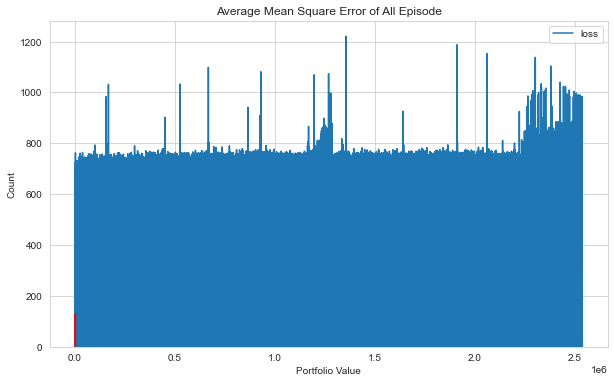

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

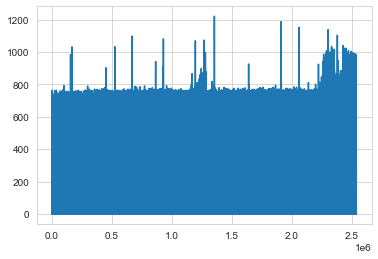

In [5]:
plt.plot(agent.model.losses)

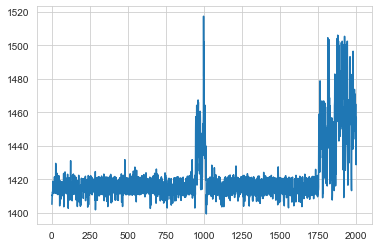

In [6]:
plt.plot(portfolio_value)

episode end value: 1081.39, duration: 0:00:00.195029
Sell: 529 times, Buy: 521 times


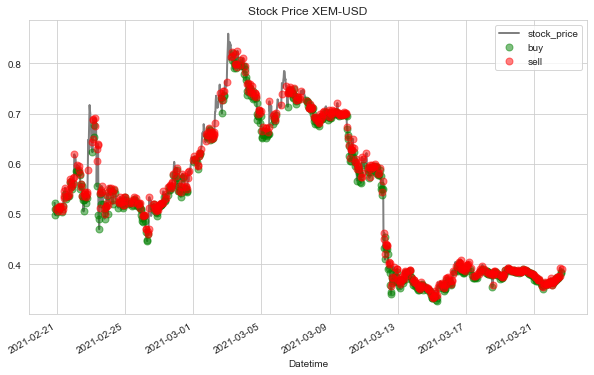

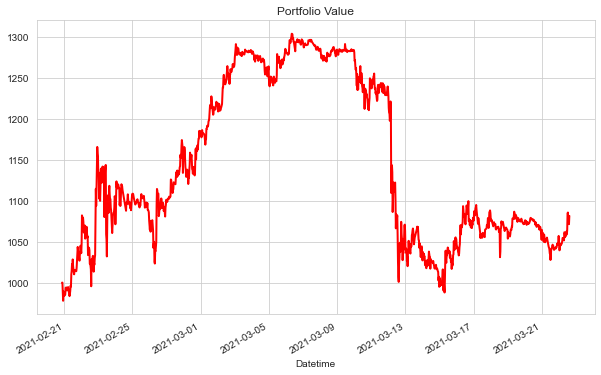

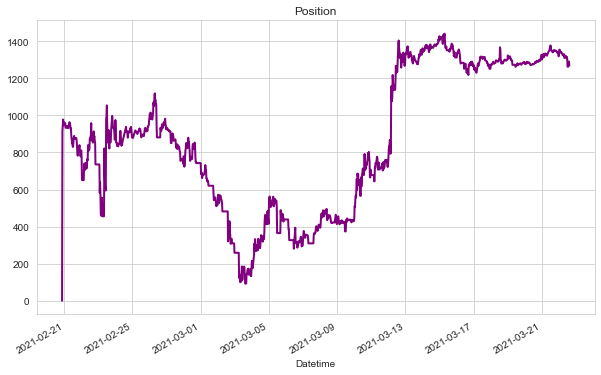

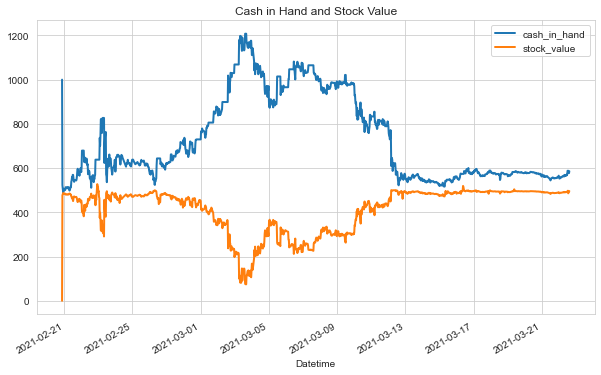

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: XEM-USD
Start: 2021-02-20 21:00:00+00:00  End: 2021-03-22 14:30:00+00:00
Compound Annual Growth Rate: 1.56 %
Volatility: 0.1268
shape ratio: 0.0366
Maximun drawdown: -24.22 %
Calmar ratio: 0.0646
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -5.60 %
Volatility (benchmark): 0.3274
shape ratio: -0.2047
Maximun drawdown: -61.87 %
Calmar ratio (benchmark): -0.0905


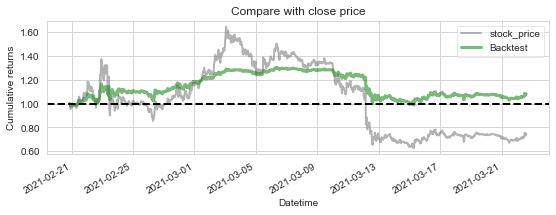

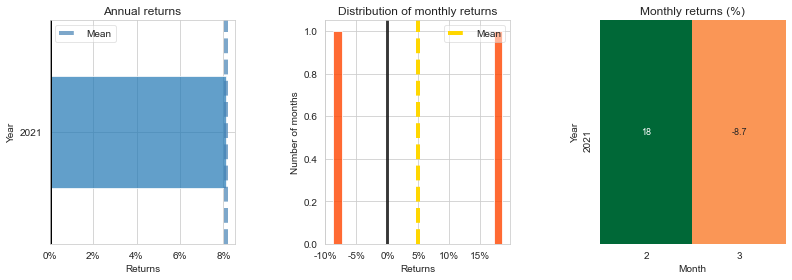

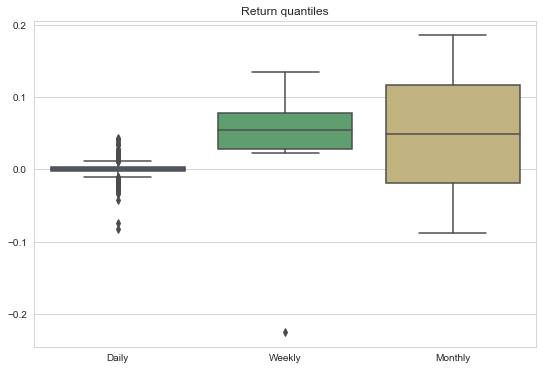

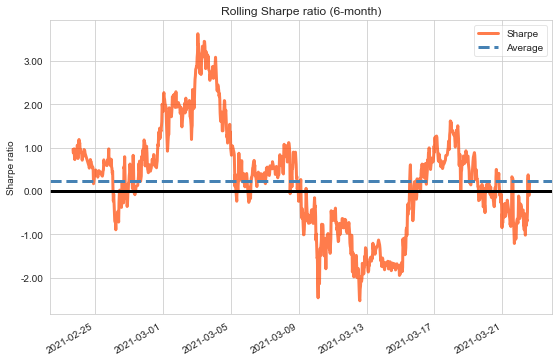

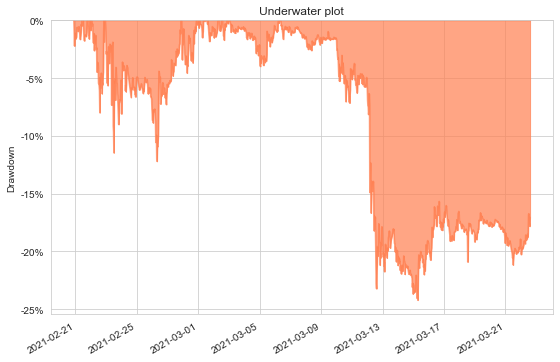

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')